# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Importando datasets

In [2]:
adult = pd.read_csv("train_data.csv", na_values = "?")

adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [3]:
testadult = pd.read_csv("test_data.csv", na_values = "?")
testadult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


# Data Cleaning

## adult treino

In [4]:
# Detalhando a quantidade de dados faltantes em cada coluna

adult.isnull().sum()

Id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Pode-se observar que apenas as colunas "workclass", "occupation" e "native.country" possuem valores faltantes, todos possuem dados do tipo "string".

In [5]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

columns = ['workclass', 'occupation', 'native.country']

adult[columns] = pd.DataFrame(imp.fit_transform(adult[columns]))

adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [6]:
adult.isnull().sum()

Id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## adult teste

In [7]:
testadult[columns] = pd.DataFrame(imp.fit_transform(adult[columns]))

testadult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,44,United-States
1,1,64,Local-gov,152537,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,Hungary


In [8]:
testadult.isnull().sum()

Id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

# Data Exploration

In [9]:
# Descrição do dataset

In [10]:
adult.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# HeatMap de correlação entre features

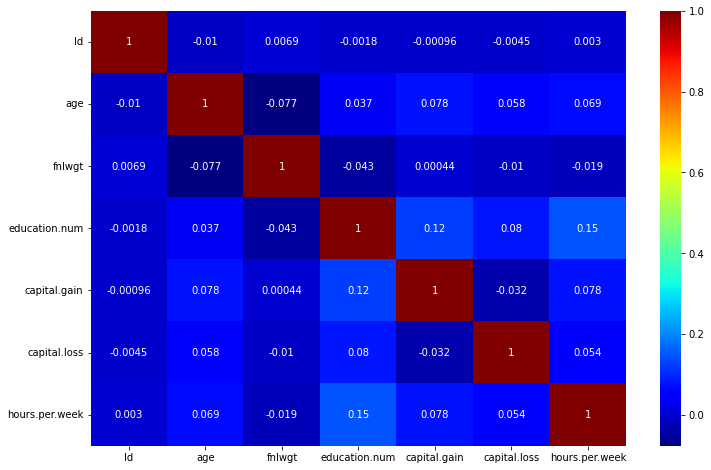

In [12]:
plt.figure(figsize=(12,8))
dataplot = sns.heatmap(adult.corr(), cmap="jet", annot=True)
plt.show()

## Features categóricas

In [13]:
features = ['workclass','education','marital.status','occupation','relationship','race','sex']

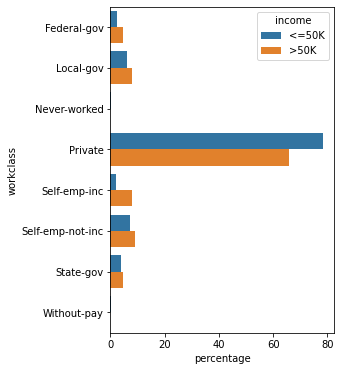

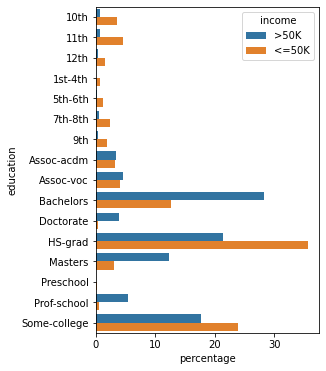

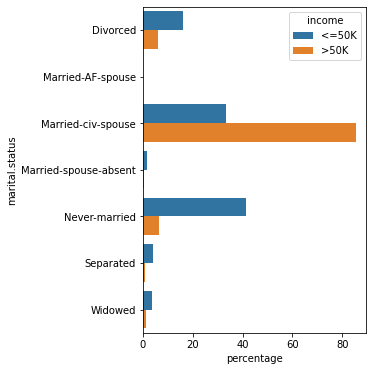

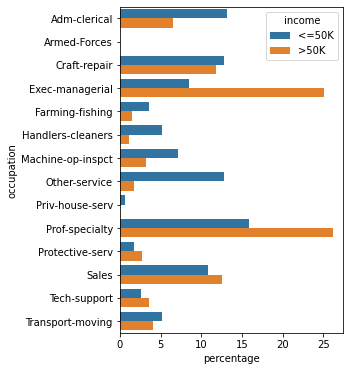

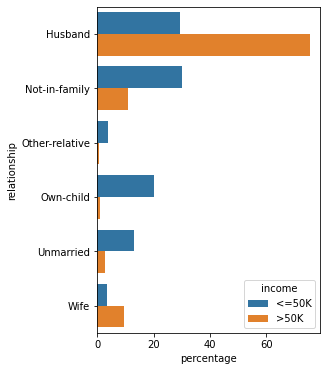

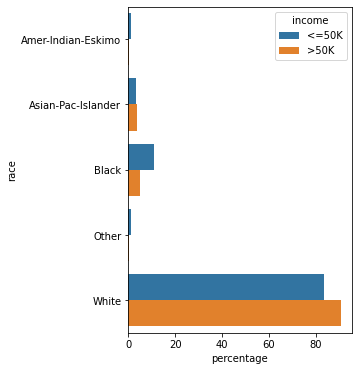

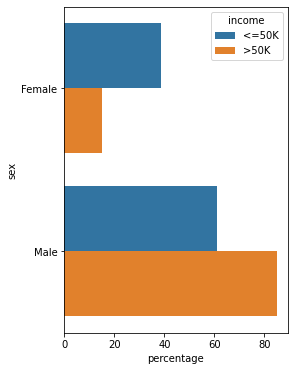

In [14]:
for n in features:
    plt.figure(figsize=(4,6))
    adultpercentage = (adult.groupby(['income'])[n]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(n))
    
    sns.barplot(data = adultpercentage,x='percentage',y =n,hue='income')
    plt.show()

## Features numéricas

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

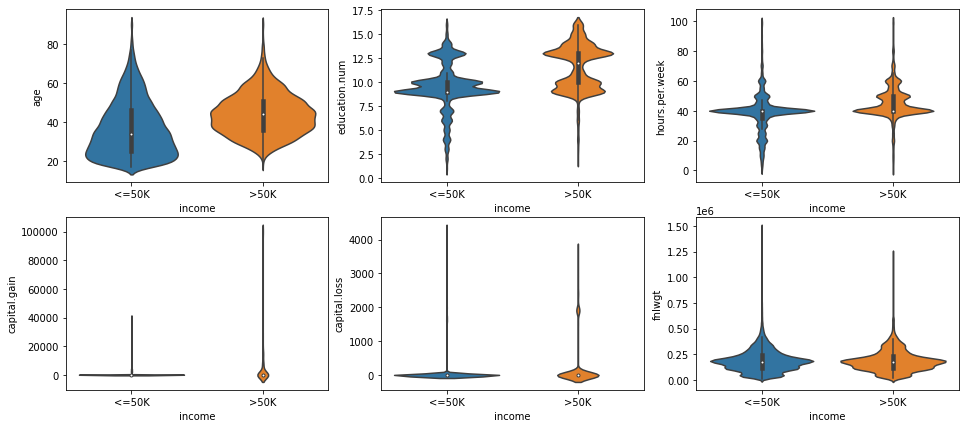

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(16, 7))

sns.violinplot(data = adult,x='income',y = 'age',ax=axs[0, 0])
sns.violinplot(data = adult,x='income',y = 'education.num',ax=axs[0, 1])
sns.violinplot(data = adult,x='income',y = 'capital.gain',ax=axs[1, 0])
sns.violinplot(data = adult,x='income',y = 'capital.loss',ax=axs[1, 1])
sns.violinplot(data = adult,x='income',y = 'hours.per.week',kde=True,ax=axs[0, 2])
sns.violinplot(data = adult,x='income',y = 'fnlwgt',ax=axs[1, 2])

Pode-se observar que a variável "fnlwgt" parece não ter uma diferença significativa entre a categoria de interesse "income".

# Feature Engineering

## Fazendo encoding de valores categóricos para numéricos

In [16]:
# OrdinalEncoder para features onde a ordem importa

from sklearn.preprocessing import OrdinalEncoder

features = ['workclass','education','marital.status']

ord_enc = OrdinalEncoder()

# primeiramente para o os dados de treino

adult[features] = ord_enc.fit_transform(adult[features])

In [17]:
adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,3.0,204991,15.0,10,0.0,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,1.0,310085,0.0,6,2.0,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,3.0,146117,15.0,10,4.0,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,3.0,138938,15.0,10,0.0,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,4.0,258883,11.0,9,2.0,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [18]:
# para os dados de teste

testadult[features] = ord_enc.fit_transform(testadult[features])

testadult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,3.0,120596,9.0,13,4.0,Exec-managerial,Not-in-family,White,Male,0,0,44,United-States
1,1,64,1.0,152537,9.0,13,2.0,Transport-moving,Husband,White,Male,0,0,45,United-States
2,2,31,3.0,100135,12.0,14,0.0,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States
3,3,45,3.0,189123,11.0,9,4.0,Adm-clerical,Own-child,White,Male,0,0,40,United-States
4,4,64,4.0,487751,9.0,13,2.0,Transport-moving,Husband,White,Male,0,0,50,Hungary


In [19]:
# OndeHotEncoder para demais features categóricas

features = ['occupation','relationship','race','sex']

adult = pd.get_dummies(adult, columns=features)

adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,capital.gain,capital.loss,hours.per.week,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,16280,34,3.0,204991,15.0,10,0.0,0,0,44,...,1,0,0,0,0,0,0,1,0,1
1,16281,58,1.0,310085,0.0,6,2.0,0,0,40,...,0,0,0,0,0,0,0,1,0,1
2,16282,25,3.0,146117,15.0,10,4.0,0,0,42,...,0,0,0,0,0,0,0,1,0,1
3,16283,24,3.0,138938,15.0,10,0.0,0,0,40,...,0,0,0,0,0,0,0,1,1,0
4,16284,57,4.0,258883,11.0,9,2.0,5178,0,60,...,0,0,0,0,0,0,0,1,0,1


In [20]:
testadult = pd.get_dummies(testadult, columns=features)

testadult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,capital.gain,capital.loss,hours.per.week,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,25,3.0,120596,9.0,13,4.0,0,0,44,...,0,0,0,0,0,0,0,1,0,1
1,1,64,1.0,152537,9.0,13,2.0,0,0,45,...,0,0,0,0,0,0,0,1,0,1
2,2,31,3.0,100135,12.0,14,0.0,0,0,40,...,0,0,0,0,0,0,0,1,1,0
3,3,45,3.0,189123,11.0,9,4.0,0,0,40,...,1,0,0,0,0,0,0,1,0,1
4,4,64,4.0,487751,9.0,13,2.0,0,0,50,...,0,0,0,0,0,0,0,1,0,1


# Implementação de um modelo kNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

features = ["Id","fnlwgt","native.country"]


adult = adult.drop(columns = features)

X_train = adult.drop(columns = 'income')
Y_train = adult['income']

XtestAdult = testadult.drop(columns = features)

# Avaliação de performance do modelo e resultados

In [22]:
# Utilizando k = 20 pois foi o que obteve melhor resultado

knn = KNeighborsClassifier(n_neighbors = 20)

knn.fit(X_train,Y_train)

YtestPred = knn.predict(XtestAdult)

In [23]:
score = cross_val_score(knn, X_train, Y_train, cv = 10, scoring="accuracy")

print(score)

print("\n Acurácia:", score.mean())

[0.84643735 0.84797297 0.84920147 0.84981572 0.85135135 0.85012285
 0.85872236 0.84797297 0.84981572 0.85534398]

 Acurácia: 0.8506756756756758


In [24]:
result = pd.DataFrame(YtestPred,testadult['Id'])
result

,0
Id,
0,<=50K
1,<=50K
2,>50K
3,<=50K
4,>50K
...,...
16275,<=50K
16276,<=50K
16277,<=50K


In [25]:
result.to_csv("submission.csv", index=True, index_label='Id')